In [37]:
# LOGISTIC REGRESSION IMPELEMENTATION

# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [38]:
# Training and testing data preperation
df = pd.read_csv("../Data/Dataset.csv")






,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,...,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,winner_encoded,home_team_result
0,22,23,5,0,6,2,1,0,1,0,...,8,0,3,4,22,10,38,62,22,1.0
1,8,31,0,1,0,5,2,0,0,0,...,4,6,3,6,12,6,41,59,31,0.0
2,16,13,0,1,5,2,1,0,3,0,...,4,3,6,6,22,14,67,33,13,0.0
3,21,27,3,3,4,5,1,0,1,0,...,4,7,3,5,12,10,33,67,21,1.0
4,10,1,2,1,5,1,1,0,3,0,...,6,2,5,3,16,19,55,45,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,22,6,2,2,6,8,1,0,4,0,...,6,4,7,11,25,18,35,65,22,1.0
60,10,2,1,0,4,5,2,0,3,0,...,6,4,8,5,6,16,36,64,10,1.0
61,6,9,2,1,8,4,2,0,1,0,...,8,3,11,6,23,14,55,45,6,1.0
62,2,9,2,0,4,5,1,0,2,0,...,5,7,3,7,11,4,42,58,2,1.0


In [70]:
# Define model, train and test
from sklearn.linear_model import LogisticRegression
data = df.head(48)
# display(data)

features = data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count","winner_encoded", "home_team_result"  ], axis=1)
targets = data['home_team_result'].values 

features_train , targets_train = features, targets

test = df.tail(16)

test_features = test.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count","winner_encoded", "home_team_result"  ], axis=1)
test_target = test['home_team_result'].values

features_test, target_test = test_features, test_target

model = LogisticRegression(max_iter = 1000)

model.fit(features_train, targets_train)

outcome_predict = model.predict(features_test)

print(model.predict(features_test))
print(model.score(features_test, target_test))




,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,...,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,winner_encoded,home_team_result
48,10,0,4,3,0,4,3,0,5,0,...,5,5,4,1,21,15,39,61,10,1.0
49,31,21,2,1,2,10,0,0,1,0,...,4,6,2,8,13,13,32,68,31,1.0
50,27,22,1,1,6,5,1,0,2,0,...,10,2,7,4,5,19,78,22,22,0.0
51,6,7,1,1,5,4,0,0,1,0,...,7,4,7,9,5,19,53,47,7,0.0
52,3,15,2,0,8,7,2,0,4,0,...,11,2,6,5,6,17,48,52,3,1.0
53,2,14,3,2,10,6,0,0,1,0,...,9,5,9,4,13,9,57,43,2,1.0
54,28,29,1,0,3,11,1,0,2,1,...,4,5,6,4,11,13,32,68,28,1.0
55,4,9,1,1,2,7,6,0,2,0,...,5,3,7,9,23,13,47,53,4,1.0
56,31,10,0,2,4,3,2,0,2,0,...,5,3,6,8,17,15,38,62,10,0.0
57,3,2,1,2,8,4,2,0,2,0,...,10,4,7,4,14,16,58,42,2,0.0


[0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
0.4375


In [71]:
# Generate graphs
from sklearn.metrics import confusion_matrix 

cf_matrix = confusion_matrix(outcome_predict,targetsTest)

print(cf_matrix)



[[0 4]
 [5 7]]


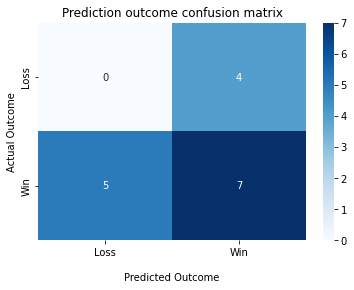

In [77]:
import seaborn as sns 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Prediction outcome confusion matrix')
ax.set_xlabel('\nPredicted Outcome')
ax.set_ylabel('Actual Outcome');

ax.xaxis.set_ticklabels(['Loss','Win'])
ax.yaxis.set_ticklabels(['Loss','Win'])

plt.show()
# fig = plt.figure()
# fig.savefig("anything.png")